In [1]:
%load_ext autoreload

In [3]:
import tensorflow as tf
import tensorflow_probability as tfp
import tensorflow_io as tfio
import scipy as sp
import matplotlib.colors as mcolors

In [5]:
import jax.numpy as jnp
import cr.wavelets as wt

In [6]:
%autoreload
from audio_diffusion import *

In [9]:
x = wav_to_tf('piano.wav')

In [20]:
def show(X):
    plt.figure(figsize=(20,3),dpi=100)
    plt.imshow(tf.transpose(X),origin='lower',cmap='RdBu',aspect=0.25)
    plt.colorbar()
    σ = tf.math.reduce_std(X)
    plt.clim((-3*σ,3*σ))

12000.0


6000.0


3000.0


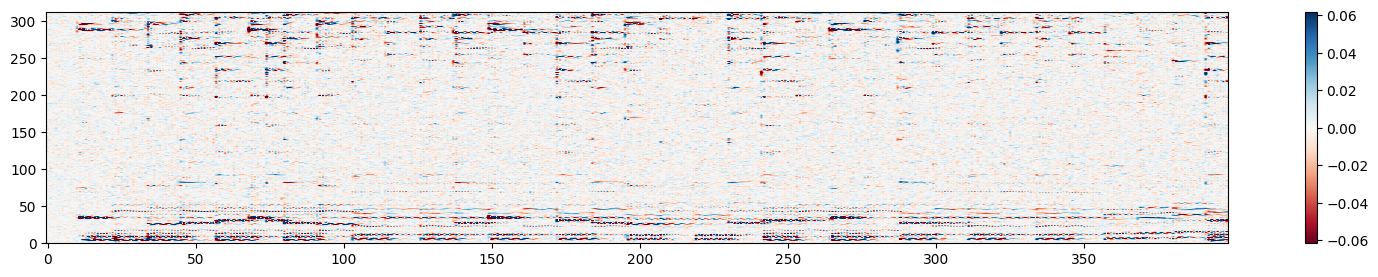

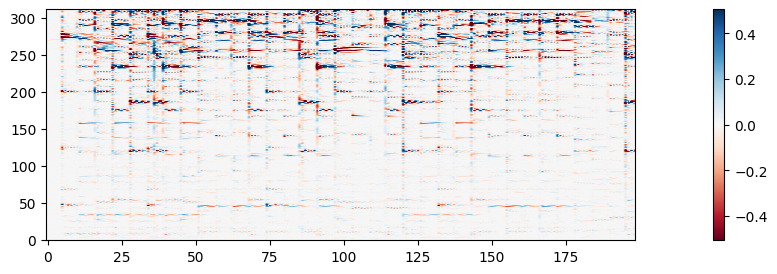

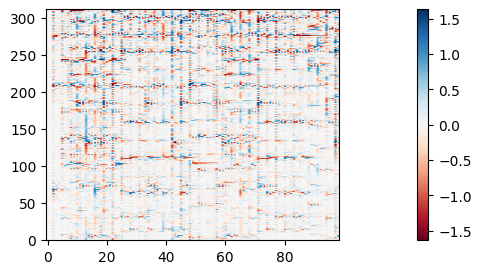

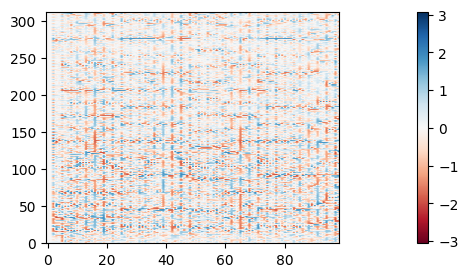

In [21]:
fs = 24000;
L = x;
for i_octave in range(3):
    fs = fs/2
    print(fs)
    LH = wt.dwt(L,'dmey'); 
    L = LH[0]
    H = LH[1]
    play(H,fs)
    XL = mdct(L)
    XH = mdct(H)
    show(slog(slog(XH)))
play(L,fs)
show(slog(slog(XL)))